In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


#load data and first look
df = pd.read_excel("Financial Data Clean.xlsx")
df.drop("Currency",axis=1,inplace=True)

#df["Currency"].unique()  #only USD
#df["Year"].unique()  #2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023
#df["business_unit"].unique() #["Software","Advertising","Hardware"])
#df.describe()
df = df[df["Year"]>=2021]
df

,Account,business_unit,Year,Scenario,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
243,Sales,Software,2021,Actuals,59639063.0,63214286.0,68906761.0,89830559.0,68972328.0,59933044.0,72743937.0,88182249.0,78099559.0,53303092.0,86545338.0,71448927.0
244,Cost of Goods Sold,Software,2021,Actuals,-23973231.0,-30015539.0,-31134647.0,-40970359.0,-30502322.0,-27410189.0,-31991409.0,-42313803.0,-36050532.0,-22452316.0,-37931056.0,-34824020.0
245,Commissions Expense,Software,2021,Actuals,-2750475.0,-2995013.0,-3278513.0,-4096853.0,-3074312.0,-2633099.0,-3191085.0,-3613606.0,-3551148.0,-2501128.0,-4117957.0,-2909146.0
246,Payroll Expense,Software,2021,Actuals,-6051302.0,-6651645.0,-8229415.0,-9866087.0,-7274833.0,-7190572.0,-8102482.0,-10459385.0,-8592628.0,-6623440.0,-9176467.0,-8483908.0
247,Travel & Entertainment Expense,Software,2021,Actuals,-717745.0,-784976.0,-740504.0,-1034005.0,-808709.0,-686323.0,-731485.0,-990377.0,-910664.0,-637021.0,-1007342.0,-861790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Travel & Entertainment Expense,Hardware,2023,Forecast,-295046.0,-288819.0,-270521.0,-299399.0,-259557.0,-306337.0,-302042.0,-335932.0,-352326.0,-202497.0,-209741.0,-306375.0
347,R&D Expense,Hardware,2023,Forecast,-1063042.0,-1383994.0,-1005520.0,-1122436.0,-1105967.0,-1152280.0,-1172596.0,-1435420.0,-1381456.0,-865769.0,-855963.0,-1188799.0
348,Consulting Expense,Hardware,2023,Forecast,-1440304.0,-1476449.0,-1202261.0,-1447697.0,-1227951.0,-1255275.0,-1424563.0,-1942571.0,-1593839.0,-1037651.0,-1097675.0,-1397647.0
349,Software/Hardware Expense,Hardware,2023,Forecast,-1825596.0,-1941785.0,-1833335.0,-2389482.0,-1906406.0,-1777976.0,-2005933.0,-2661184.0,-2463031.0,-1455030.0,-1398480.0,-1954771.0


In [3]:
"""
Create DataFrame for each year and scenario, only them, group the data by account and continue the analysis  

Adapt code to the number of years in each scenario
"""
#df subsets for each YEAR
df_Actuals=[] #[2021,2022]

for i in range(2021,2023):
    df_Actuals.append(df[(df["Year"] == i) & (df["Scenario"] == "Actuals")])

df_Budget=df[(df["Year"]==2023) & (df["Scenario"]=="Budget")] # 2023
df_Forecast=df[(df["Year"]==2023) & (df["Scenario"]=="Forecast")] # 2023


#sum the monthly values and group by Account (9 unique)
for m in range(2):
    df_Actuals[m] = df_Actuals[m].groupby("Account").sum(numeric_only=True).drop("Year", axis=1)

df_Budget = df_Budget.groupby("Account").sum(numeric_only=True).drop("Year", axis=1)
df_Forecast = df_Forecast.groupby("Account").sum(numeric_only=True).drop("Year", axis=1)

#

#test


In [4]:
#Getting separated Series for each Account in the previous datasets
Accounts_Budget2023 = []
Accounts_Forecast2023 = []
Accounts_Actuals2021 = []
Accounts_Actuals2022 = []


for index,row in df_Budget.iterrows():
    Accounts_Budget2023.append(row)

for index,row in df_Forecast.iterrows():
    Accounts_Forecast2023.append(row)

for index,row in df_Actuals[0].iterrows(): #2021
    Accounts_Actuals2021.append(row)

for index,row in df_Actuals[1].iterrows(): #2022
    Accounts_Actuals2022.append(row)


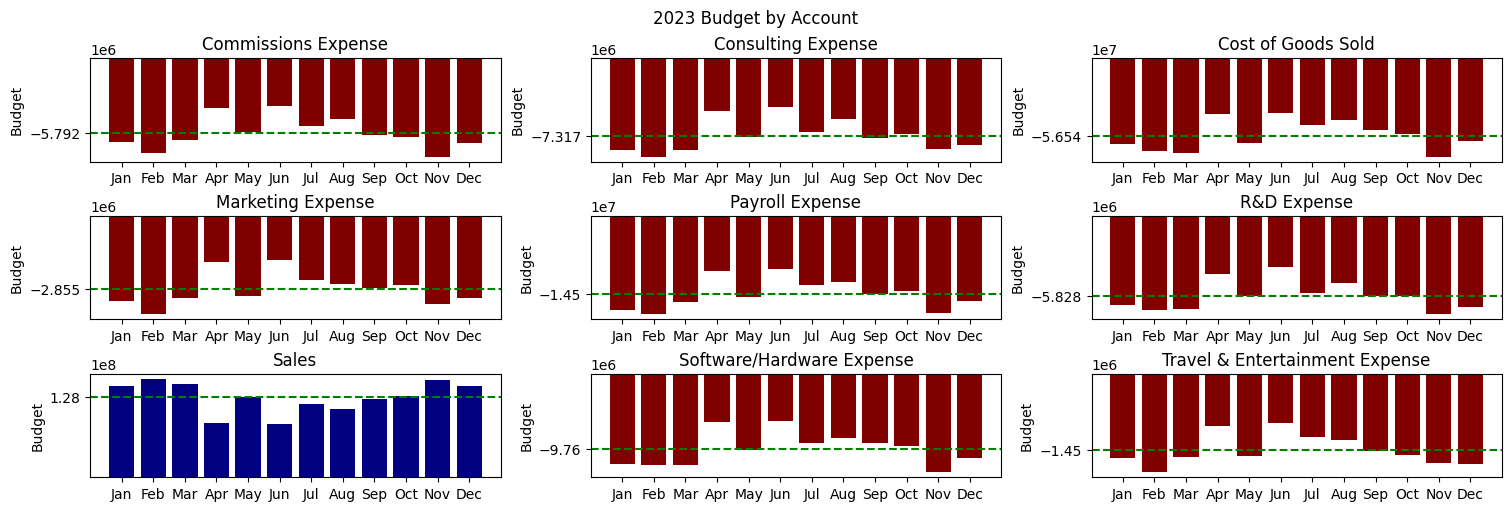

In [5]:
fig,ax = plt.subplots(ncols=3,nrows=3,layout="constrained")
fig.suptitle("2023 Budget by Account")
fig.set_size_inches(15,5)

k=0
for i in range(3):
    for j in range(3):
        
        mean_monthly = Accounts_Budget2023[k].mean()
        ax[i,j].bar(list(Accounts_Budget2023[k].index),Accounts_Budget2023[k].values,color = (.5,0,0) if mean_monthly<0 else (0,0,.5))
        ax[i,j].set_title(Accounts_Budget2023[k].name)
        ax[i,j].set_ylabel("Budget")
        #ax[i,j].set_xlabel("Months")
        ax[i,j].axhline(y=mean_monthly, linestyle='--', label='Mean',color="green")
        ax[i,j].set_yticks([mean_monthly])
        k+=1

plt.show()

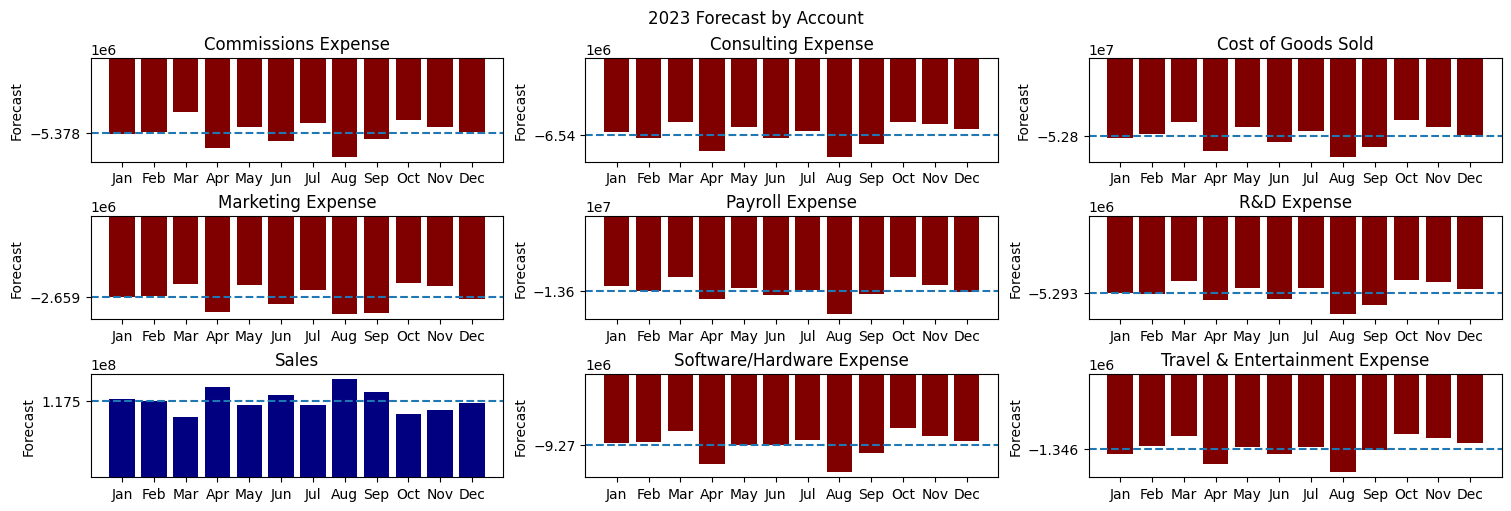

In [6]:
fig,ax = plt.subplots(ncols=3,nrows=3,layout="constrained")
fig.suptitle("2023 Forecast by Account")
fig.set_size_inches(15,5)

k=0
for i in range(3):
    for j in range(3):
        mean_monthly = Accounts_Forecast2023[k].mean()
        ax[i,j].bar(list(Accounts_Forecast2023[k].index),Accounts_Forecast2023[k].values,color = (.5,0,0) if mean_monthly<0 else (0,0,.5))
        ax[i,j].set_title(Accounts_Forecast2023[k].name)
        ax[i,j].set_ylabel("Forecast")
        #ax[i,j].set_xlabel("Months")
        ax[i,j].axhline(y=mean_monthly, linestyle='--', label='Mean')
        ax[i,j].set_yticks([mean_monthly])
        k+=1

plt.show()

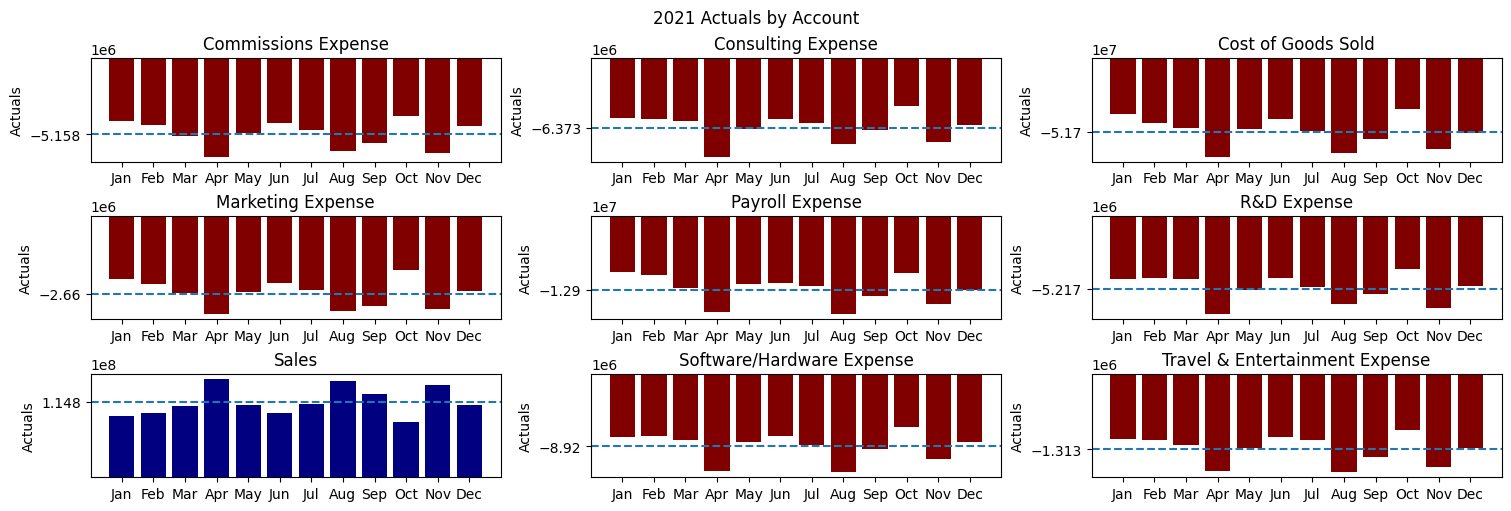

In [7]:
fig,ax = plt.subplots(ncols=3,nrows=3,layout="constrained")
fig.suptitle("2021 Actuals by Account")
fig.set_size_inches(15,5)

k=0
for i in range(3):
    for j in range(3):
        
        mean_monthly = Accounts_Actuals2021[k].mean()
        ax[i,j].bar(list(Accounts_Actuals2021[k].index),Accounts_Actuals2021[k].values,color = (.5,0,0) if mean_monthly<0 else (0,0,.5))
        ax[i,j].set_title(Accounts_Actuals2021[k].name)
        ax[i,j].set_ylabel("Actuals")
        #ax[i,j].set_xlabel("Months")
        ax[i,j].axhline(y=mean_monthly, linestyle='--', label='Mean')
        ax[i,j].set_yticks([mean_monthly])
        k+=1

plt.show()

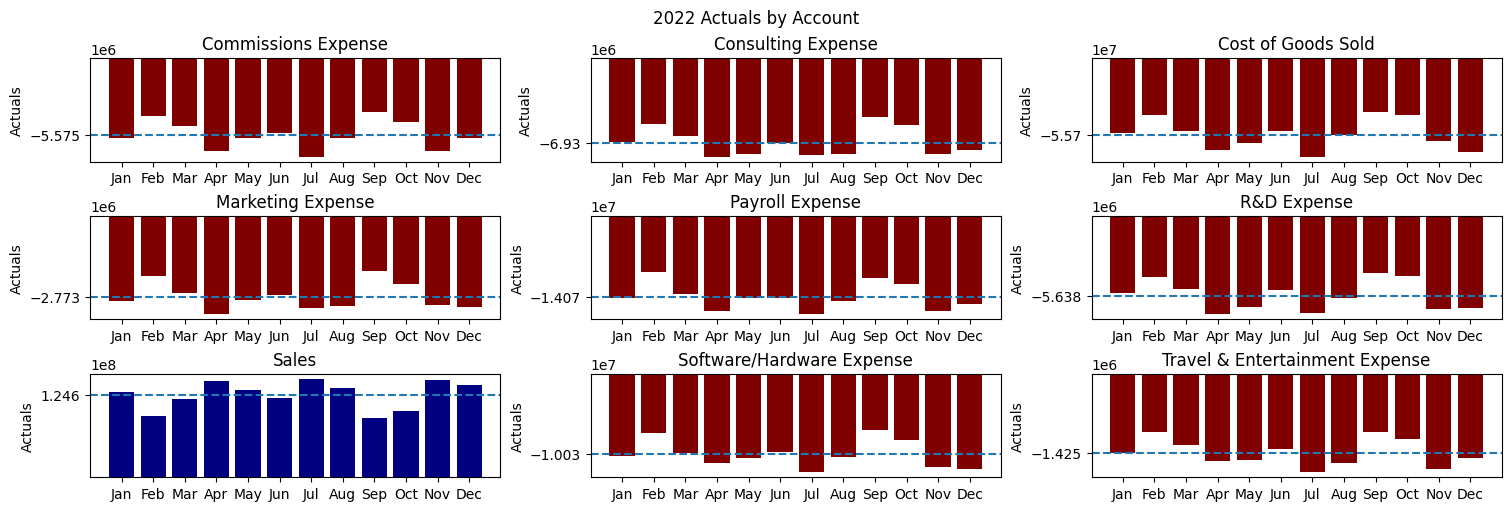

In [8]:
fig,ax = plt.subplots(ncols=3,nrows=3,layout="constrained")
fig.suptitle("2022 Actuals by Account")
fig.set_size_inches(15,5)

k=0
for i in range(3):
    for j in range(3):
        
        mean_monthly = Accounts_Actuals2022[k].mean()
        ax[i,j].bar(list(Accounts_Actuals2022[k].index),Accounts_Actuals2022[k].values,color = (.5,0,0) if mean_monthly<0 else (0,0,.5))
        ax[i,j].set_title(Accounts_Actuals2022[k].name)
        ax[i,j].set_ylabel("Actuals")
        #ax[i,j].set_xlabel("Months")
        ax[i,j].axhline(y=mean_monthly, linestyle='--', label='Mean')
        ax[i,j].set_yticks([mean_monthly])
        k+=1

plt.show()

In [9]:
dfbus = df.loc[df["Year"]>=2021]
# dfbus = dfbus.groupby(["Year","Account","business_unit","Scenario"]).sum(numeric_only=True)
dfbus = dfbus.groupby(["Year","Account","business_unit"]).sum(numeric_only=True)



dfbus.loc[2023]

Jan           Feb  \
Account                        business_unit                               
Commissions Expense            Advertising   -1.802136e+06 -1.645285e+06   
                               Hardware      -2.742439e+06 -3.020447e+06   
                               Software      -7.443032e+06 -7.959220e+06   
Consulting Expense             Advertising   -2.045173e+06 -2.175207e+06   
                               Hardware      -3.430500e+06 -3.443354e+06   
                               Software      -9.457131e+06 -1.047024e+07   
Cost of Goods Sold             Advertising   -1.690999e+07 -1.653558e+07   
                               Hardware      -2.569820e+07 -3.116294e+07   
                               Software      -7.479247e+07 -7.136264e+07   
Marketing Expense              Advertising   -9.554120e+05 -8.873680e+05   
                               Hardware      -1.295862e+06 -1.462202e+06   
                               Software      -3.707395e+06 -4.114186e+06   
Payroll Expense                Advertising   -4.633617e+06 -3.946903e+06   
                               Hardware      -6.401893e+06 -7.381484e+06   
                               Software      -1.909264e+07 -2.066964e+07   
R&D Expense                    Advertising   -1.854254e+06 -1.744693e+06   
                               Hardware      -2.595088e+06 -3.044851e+06   
                               Software      -7.367101e+06 -7.433039e+06   
Sales                          Advertising    4.037070e+07  3.796396e+07   
                               Hardware       5.875879e+07  6.358035e+07   
                               Software       1.671645e+08  1.725634e+08   
Software/Hardware Expense      Advertising   -3.280124e+06 -3.006882e+06   
                               Hardware      -4.381702e+06 -4.675838e+06   
                               Software      -1.303652e+07 -1.302401e+07   
Travel & Entertainment Expense Advertising   -4.697550e+05 -4.066640e+05   
                               Hardware      -7.068250e+05 -7.081390e+05   
                               Software      -1.861051e+06 -2.054939e+06   

                                                       Mar           Apr  \
Account                        business_unit                               
Commissions Expense            Advertising   -1.408516e+06 -1.576228e+06   
                               Hardware      -2.453029e+06 -1.926209e+06   
                               Software      -6.326969e+06 -6.838115e+06   
Consulting Expense             Advertising   -2.064442e+06 -1.981478e+06   
                               Hardware      -2.911103e+06 -2.373077e+06   
                               Software      -9.116372e+06 -8.578529e+06   
Cost of Goods Sold             Advertising   -1.530120e+07 -1.711383e+07   
                               Hardware      -2.511838e+07 -2.001392e+07   
                               Software      -7.268628e+07 -6.688238e+07   
Marketing Expense              Advertising   -7.860610e+05 -8.319920e+05   
                               Hardware      -1.226807e+06 -1.026061e+06   
                               Software      -3.441622e+06 -3.109602e+06   
Payroll Expense                Advertising   -3.779716e+06 -4.159364e+06   
                               Hardware      -5.743385e+06 -4.765840e+06   
                               Software      -1.753748e+07 -1.630339e+07   
R&D Expense                    Advertising   -1.572304e+06 -1.609803e+06   
                               Hardware      -2.402872e+06 -1.926320e+06   
                               Software      -7.234671e+06 -6.511039e+06   
Sales                          Advertising    3.440841e+07  3.548144e+07   
                               Hardware       5.161262e+07  4.429021e+07   
                               Software       1.552736e+08  1.446546e+08   
Software/Hardware Expense      Advertising   -2.961859e+06 -2.872975e+06   
                          

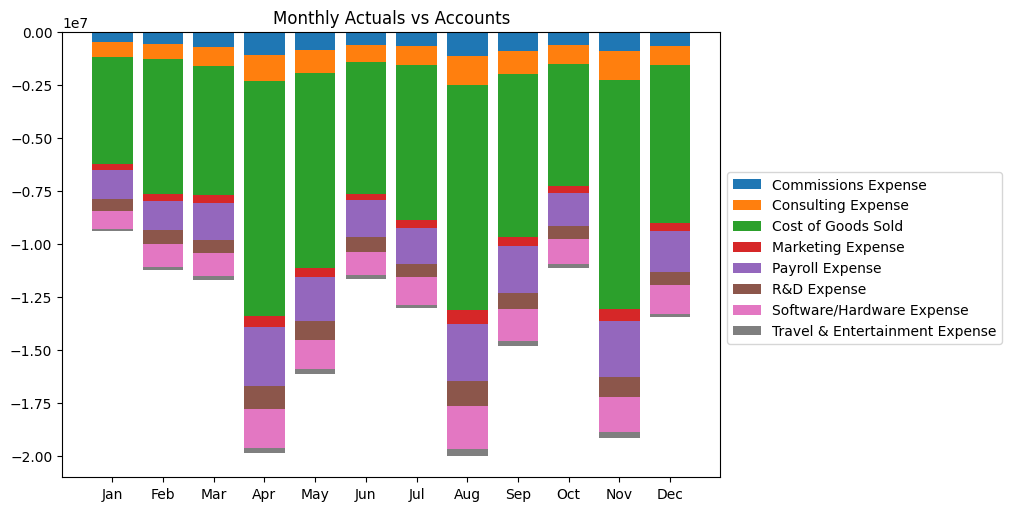

In [10]:
dfbus = df.loc[df["Year"]>=2021]
# dfbus = dfbus.groupby(["Year","Account","business_unit","Scenario"]).sum(numeric_only=True)
dfbus = dfbus.groupby(["Year","Account","business_unit"]).sum(numeric_only=True)
dfbus = dfbus.xs((2021,"Advertising"),level=["Year","business_unit"])
"""
'Sales', 'Cost of Goods Sold', 'Commissions Expense', 'Payroll Expense', 'Travel & Entertainment Expense','R&D Expense','Consulting Expense',
'Software/Hardware Expense','Marketing Expense'
"""
#SEPARATE SALES
dfSales = dfbus.loc["Sales"]

dfbus = dfbus.drop("Sales")

#scenario eval
scen = "Actuals"

fig,ax = plt.subplots(layout = "constrained")
fig.set_size_inches(10,5)

btm = np.zeros(12)
for index,row in dfbus.iterrows():
    ax.bar(x=row.index,height=row.values,label=row.name,bottom=btm)
    btm+=row.values
    
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend( bbox_to_anchor=(1.0, .7),ncol=1)

ax.set_title(f"Monthly {scen} vs Accounts")

plt.show()


In [ ]:
dfbus = df.groupby(["Year","Account","business_unit"]).sum(numeric_only=True)
dfSales = dfbus.xs((2021,"Hardware","Sales"),level=["Year","business_unit","Account"])

# fig,ax = plt.subplots()
# ax.plot(dfbus.columns,dfSales.values)
# plt.show()
dfSales.values[0]

list(dfSales.columns)



['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']